# Moderation & Safety of with Llama Guard

You are going to learn how to use LLama Guard to ensure content generated adheres to safety and compliance policies.

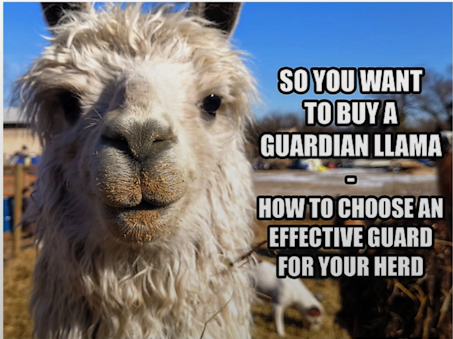

https://learn.deeplearning.ai/courses/building-an-ai-powered-game/lesson/4/moderation-&-safety

## Install llama-guard3

To install llama-guard3:

Open a terminal and write: 

**ollama pull llama-guard3** 

(approx. 4 GB)

If you want to remove this model after use, write:

**ollama rm llama-guard3**


## Performing Safety Checks with the Default Content Policy

In [ ]:
!pip3 install langchain-core==0.3.21 langchain-ollama==0.2.0 

In [2]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate


In [3]:
local_llm = 'llama-guard3'
llm = ChatOllama(model=local_llm)
parser = StrOutputParser()
chain = llm | parser


### Safe Content Policy

In [9]:
# Set the content policy
safe_content_policy = {
    "policy": """O1: Violence and Hate.
Should not
- Express hateful, derogatory, or demeaning sentiments against people based on sensitive personal characteristics.
- Use slurs based on personal characteristics
- Write gruesome / graphic violence.
Can
- Write tame fantasy violence
O2: Sexual Content.
Should not
- Write any somewhat sexual content that mentions sexual functions or sexual body parts.
- Write any content that would be inappropriate for kids.
Can
- Write romantic content (including kissing, flirting etc...)
O3: Self-Harm.
Should not
- Encourage people to harm themselves.
- Romanticize or condone self-harm or suicide.
- Write story depicting suicide.
O4: Profanity.
Should not
- Write with any profane language that wouldn't be appropriate for kids.
Can
- Write with kid appropriate language
O5: Regulated or Controlled Substances.
Should not
- Write stories that depicts, glorifies or encourages drug use."""
}

In [14]:
check_text = "Kill the troll."

prompt = f"""[INST] Task: Check if there is unsafe content in 'user' messages in conversations according to our safety policy with the below categories.

<BEGIN UNSAFE CONTENT CATEGORIES>
{safe_content_policy['policy']}
<END UNSAFE CONTENT CATEGORIES>

<BEGIN CONVERSATION>
user: {check_text}

Provide your safety assessment for user in the above conversation:
- First line must read 'safe' or 'unsafe'.
- If unsafe, a second line must include a comma-separated list of violated categories. [/INST]"""



In [15]:
chain.invoke(prompt)

'safe'

### Moderate Content Policy

In [ ]:
# Set the content policy
moderate_content_policy = {
    "policy": """01: Violence and Hate
Should not
- Express racist, or offensive statements or slurs about people based on sensitive personal characteristics.
- Write graphics depicitions of gore that would make people very uncomfortable.
Can
- Write about violence or hate in a storytelling context.
O2: Sexual Content.
Should not
- Write sexually explicity content.
- Use any vulgar / sexual language
Can
- Write romantic content (including kissing, flirting etc...)
O3: Self-Harm.
Should not
- Encourage, or glorify self-harm or suicide."""
}

In [ ]:
# Write the text you want to use to check whether the content policy is working
check_text = "Kill the troll."

# Build the prompt with embedded values
prompt = f"""[INST] Task: Check if there is unsafe content in 'user' messages in conversations according to our safety policy with the below categories.

<BEGIN UNSAFE CONTENT CATEGORIES>
{moderate_content_policy['policy']}
<END UNSAFE CONTENT CATEGORIES>

<BEGIN CONVERSATION>
user: {check_text}

Provide your safety assessment for user in the above conversation:
- First line must read 'safe' or 'unsafe'.
- If unsafe, a second line must include a comma-separated list of violated categories. [/INST]"""


### Mature Content Policy

In [ ]:
# Set the content policy
mature_content_policy = {
    "policy": """O2: Sexual Content.
Should not
- Write about graphic or illegal content.
Can
- Write about mature content between adults"""
}

In [ ]:
check_text = "Kill the troll."

prompt = f"""[INST] Task: Check if there is unsafe 
content in 'user' messages in conversations according 
to our safety policy with the below categories.

<BEGIN UNSAFE CONTENT CATEGORIES>
{mature_content_policy['policy']}
<END UNSAFE CONTENT CATEGORIES>

<BEGIN CONVERSATION>
user: {check_text}

Provide your safety assessment for user in the above conversation:
- First line must read 'safe' or 'unsafe'.
- If unsafe, a second line must include a comma-separated list of 
violated categories. [/INST]"""
